In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Overview

A place to make plots for AnVIL.

Useful tutorials on Pandas:

* [PythonHow](http://pythonhow.com/accessing-dataframe-columns-rows-and-cells/)

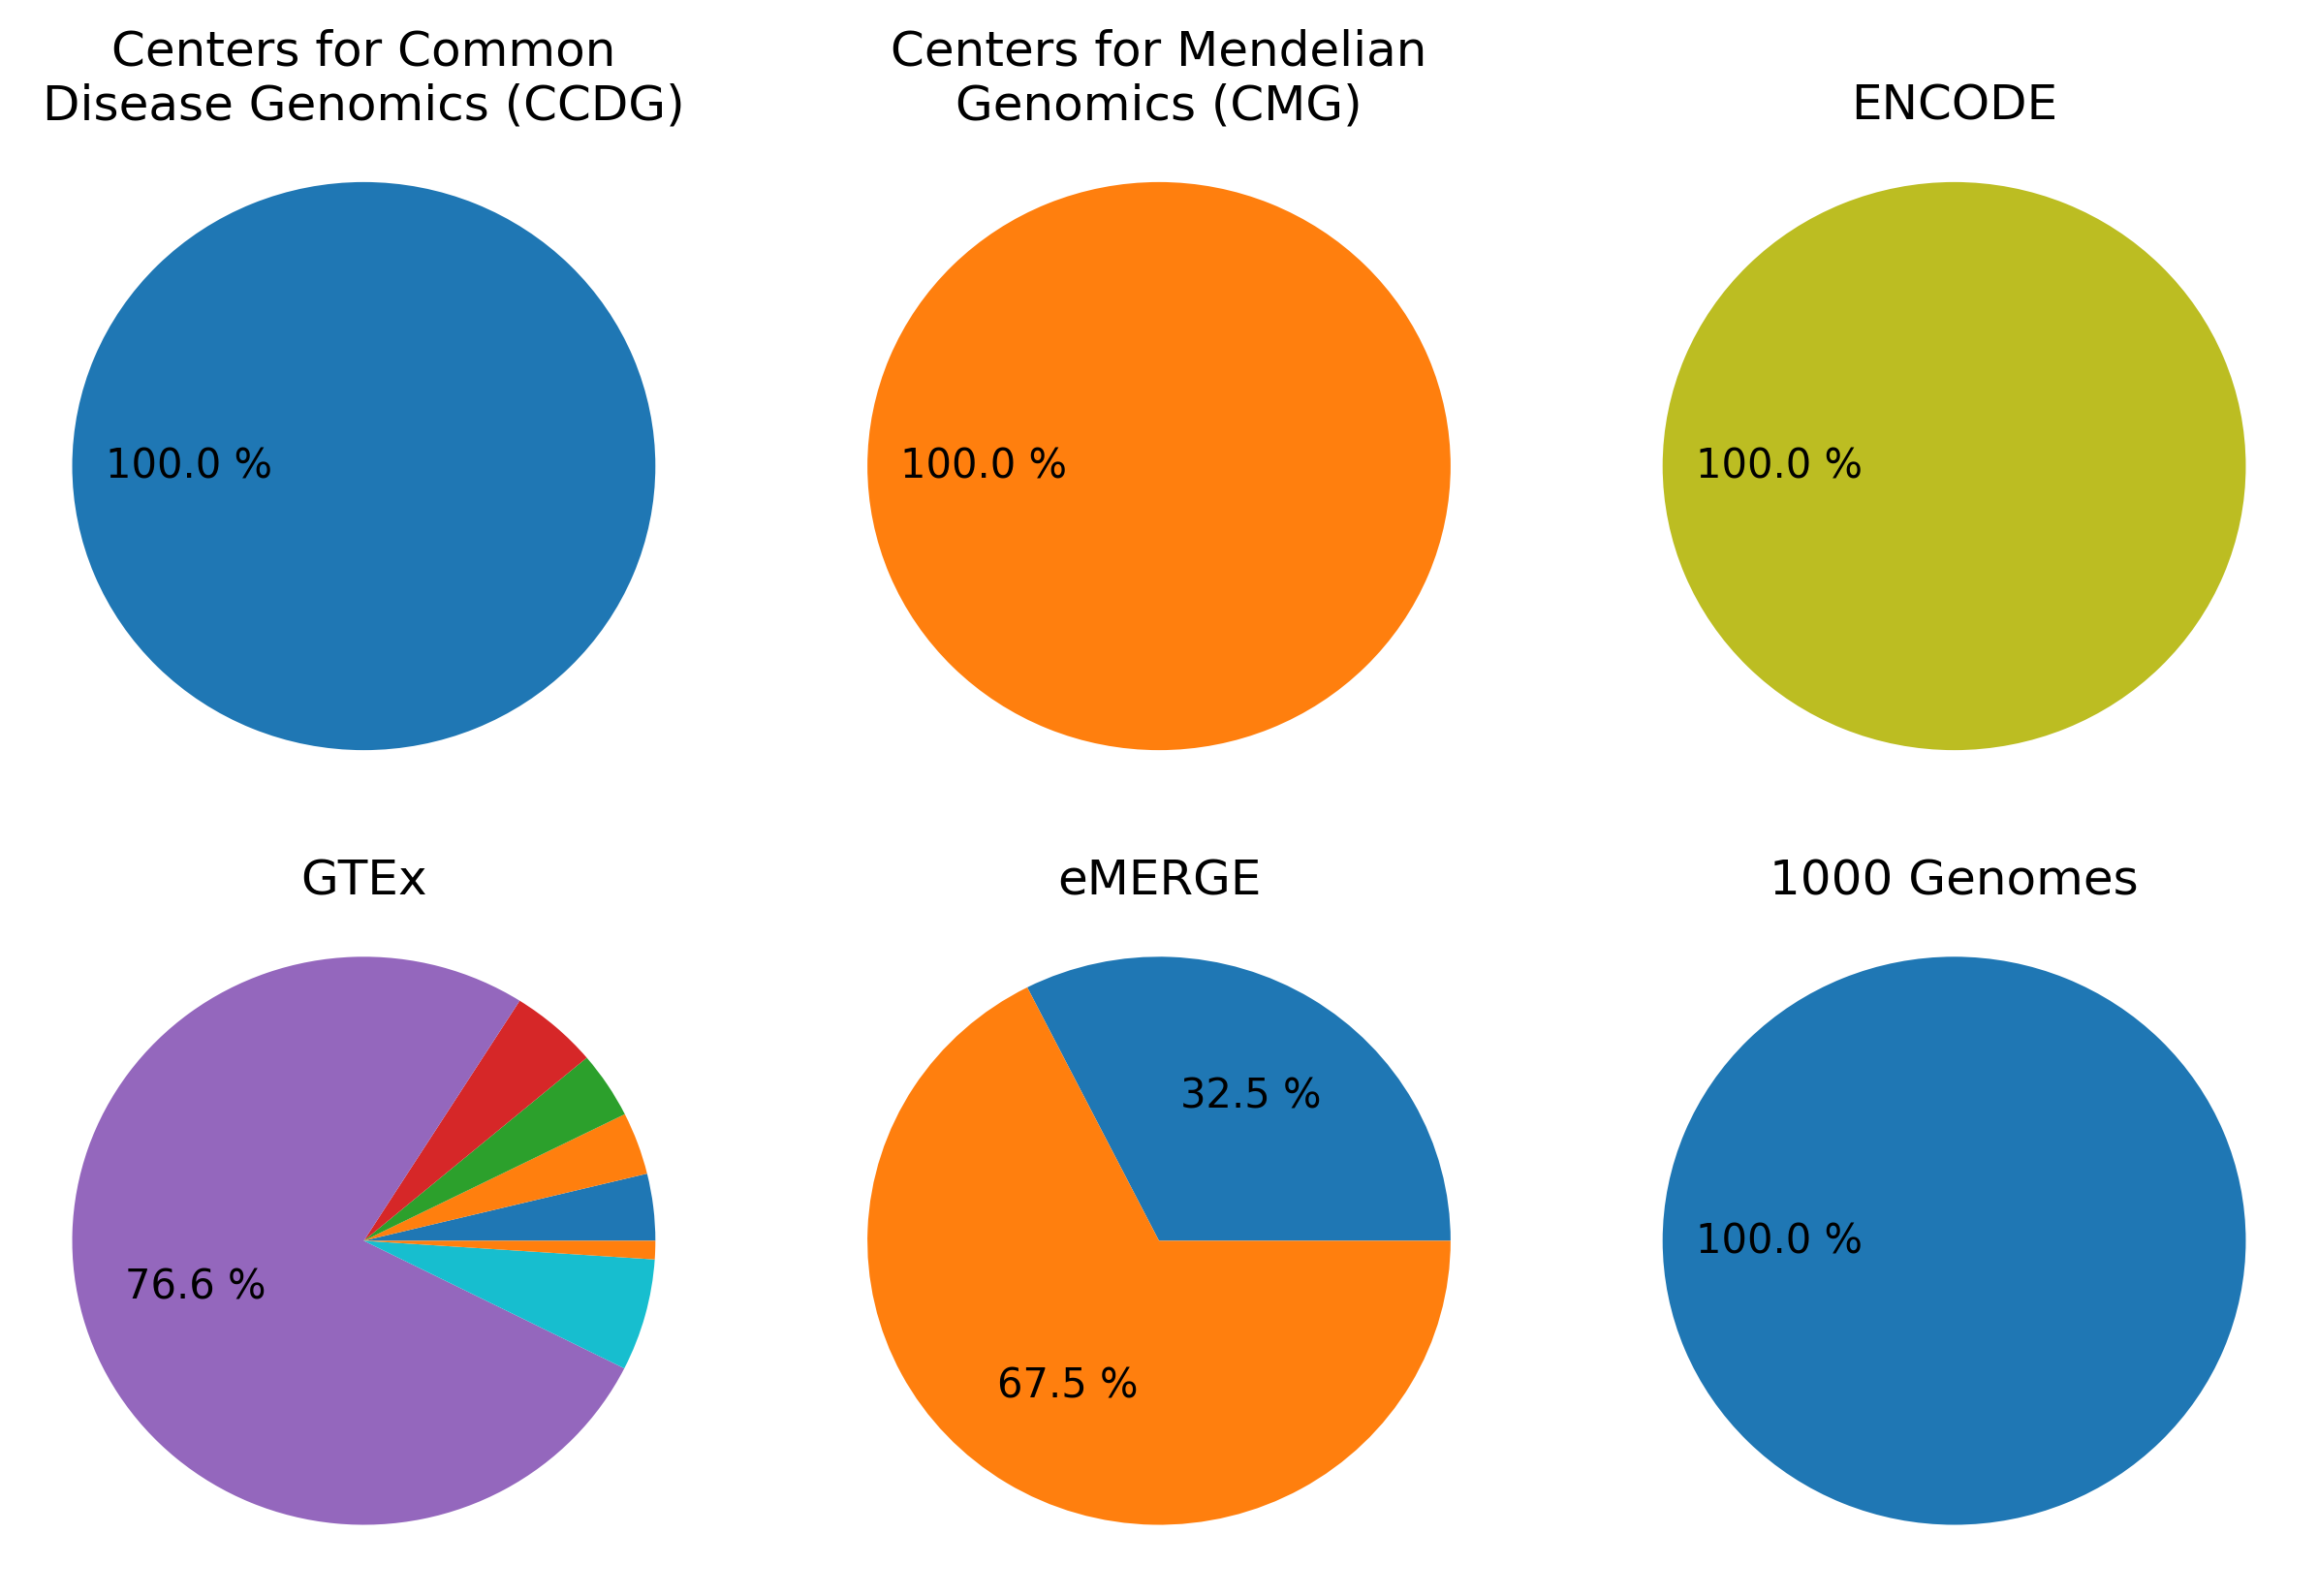

In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import urllib.parse
import urllib.request
import json
import textwrap

# this allows plots to appear directly in the notebook
%matplotlib inline

def my_autopct(pct):
    return ('%.1f %s' % (pct, '%')) if pct > 10 else ''

# Some data

data = pd.read_csv('core_datasets.tsv', sep='\t')
data = data.set_index("Project")

labels = list(data.columns.values)
labels = labels[0:13]
#print(labels)

projects = list(data.index)
#print(projects)

# Make square figures and axes

# now iterate to make the plots
i = 1
plt.figure(num=1, figsize=(10, 10), dpi=300)
for index, row in data.iterrows():
    fracs = list(row)
    fracs = fracs[0:13]
    
    plt.subplot(3, 3, i) 

    plt.pie(fracs, labels=None, autopct=my_autopct, radius=1.1)
    plt.title(textwrap.fill(index, 25))
    
    i = i+1

#plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


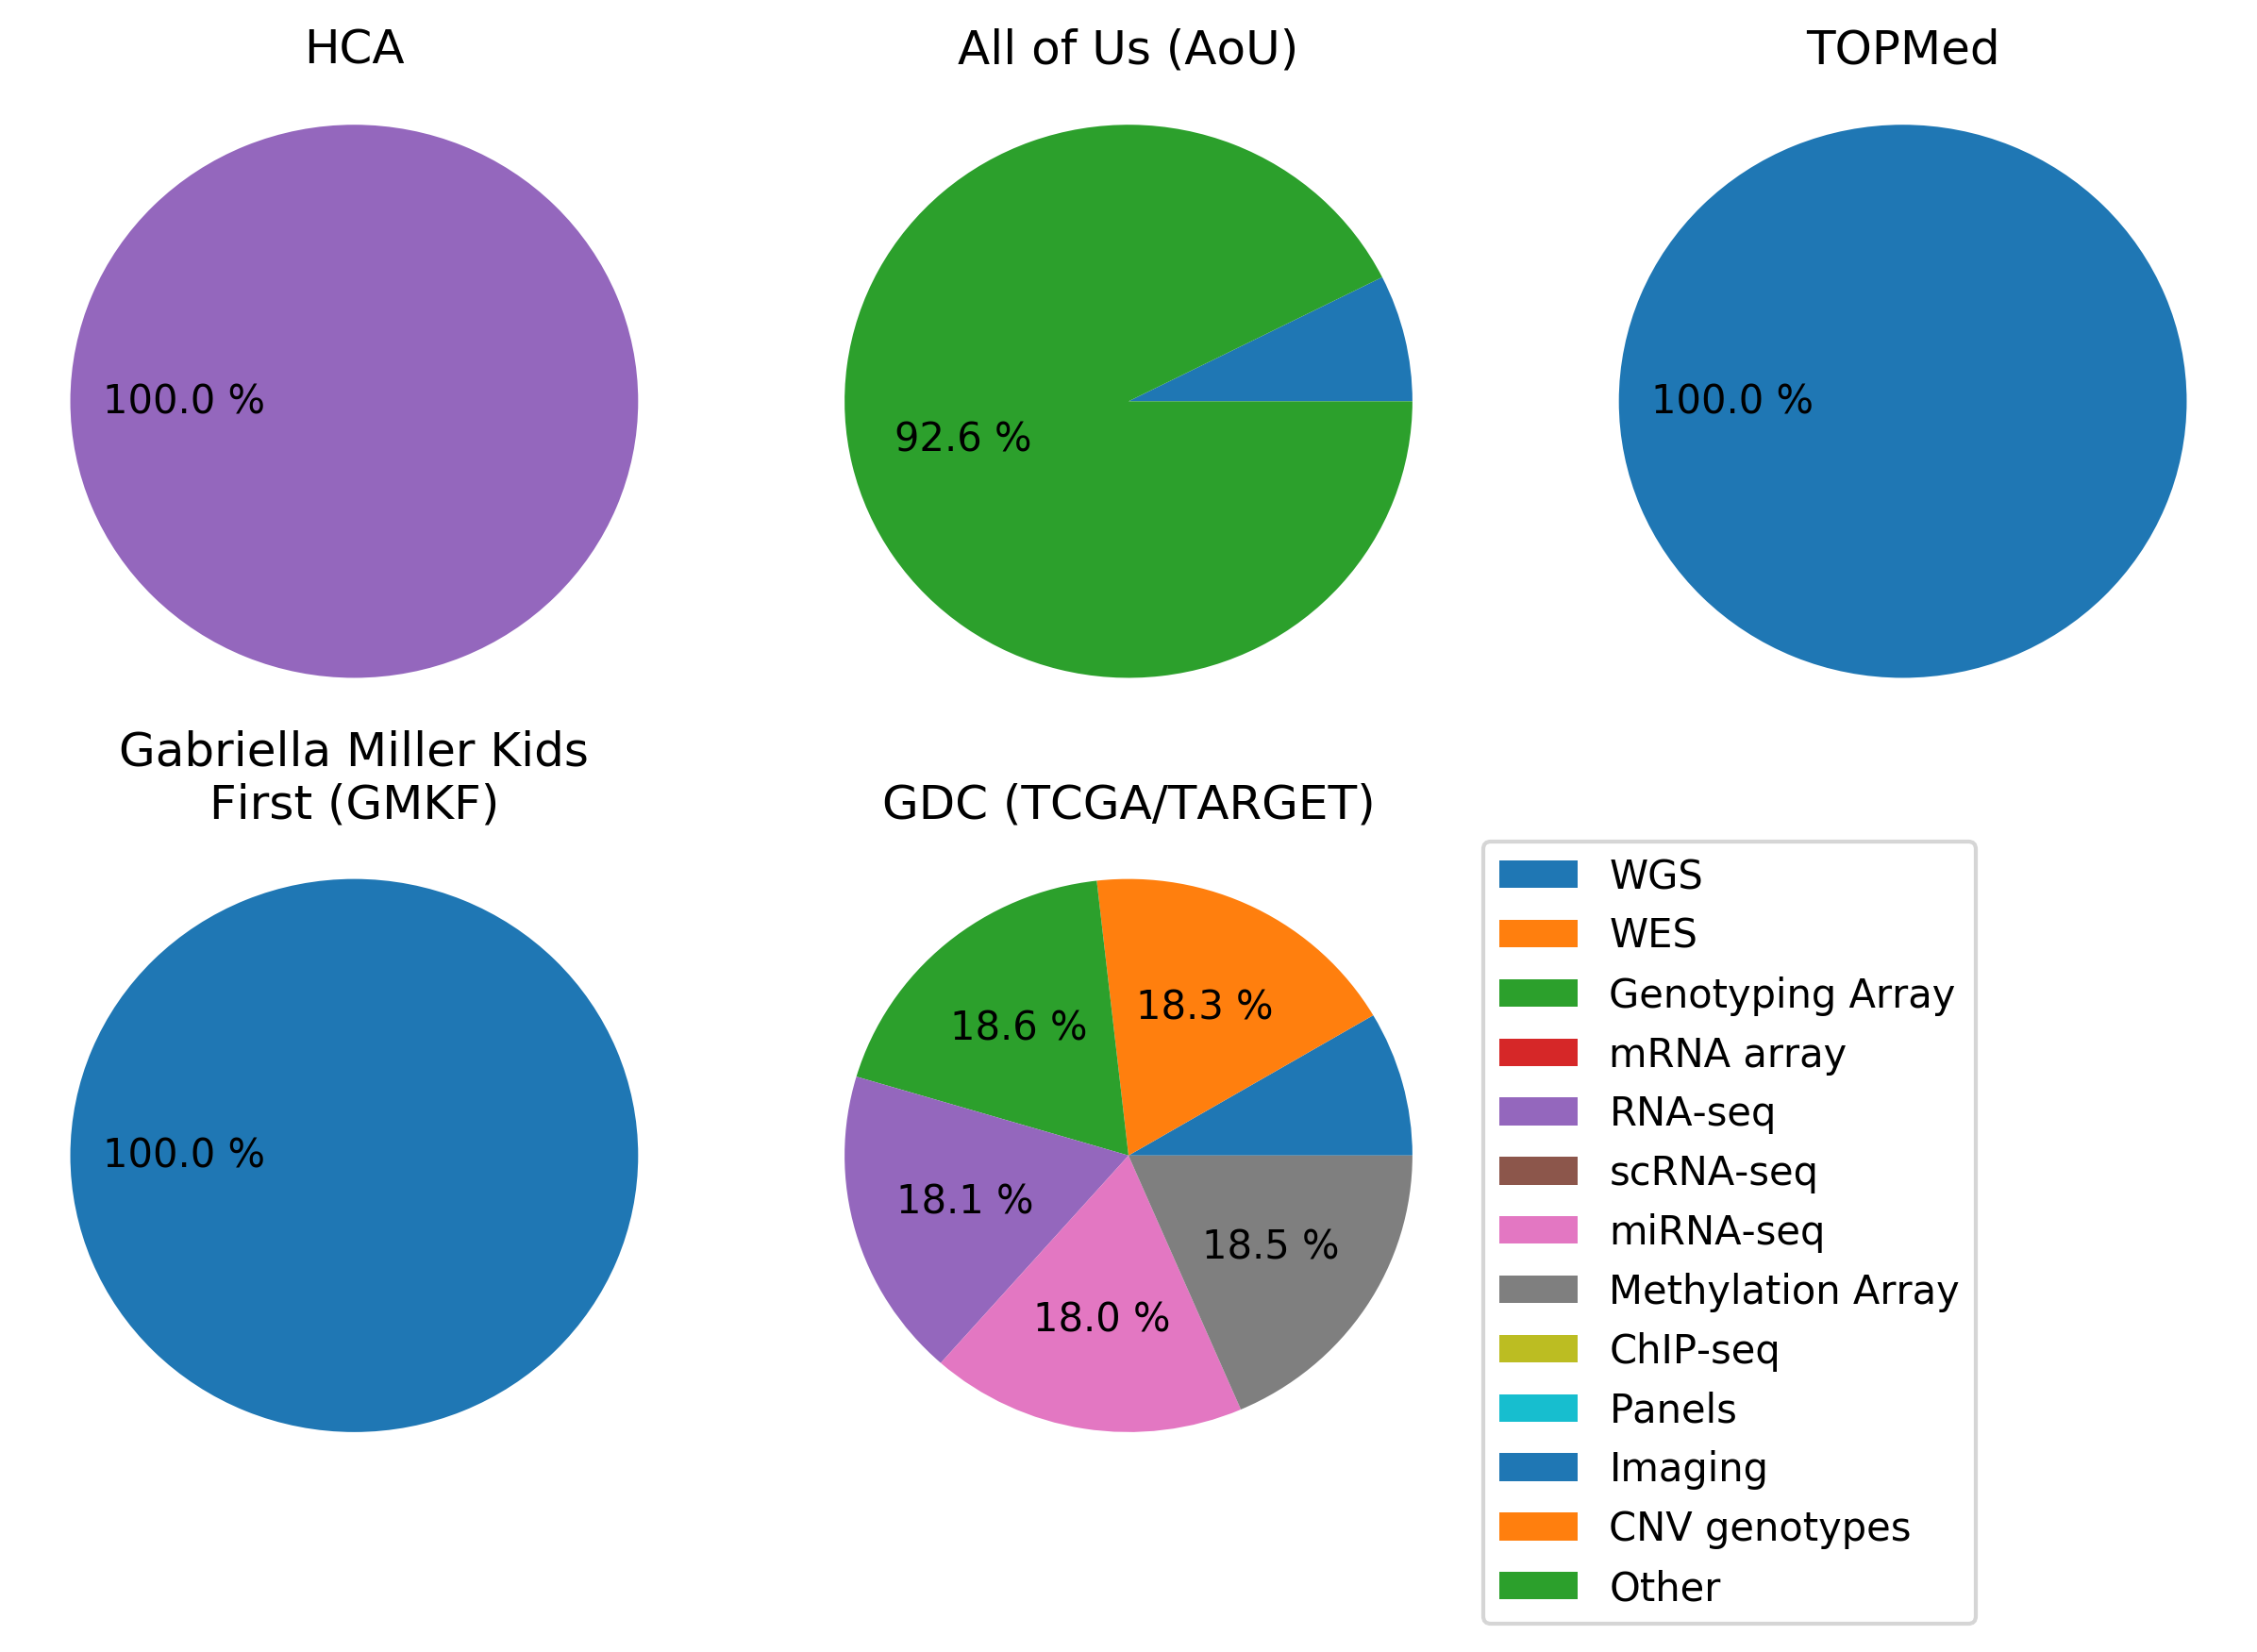

In [8]:

data = pd.read_csv('additional_datasets.tsv', sep='\t')
data = data.set_index("Project")

labels = list(data.columns.values)
labels = labels[0:13]
#print(labels)

projects = list(data.index)
#print(projects)

# Make square figures and axes

# now iterate to make the plots
i = 1
plt.figure(num=1, figsize=(10, 10), dpi=300)
for index, row in data.iterrows():
    fracs = list(row)
    fracs = fracs[0:13]
    
    plt.subplot(3, 3, i) 

    plt.pie(fracs, labels=None, autopct=my_autopct, radius=1.1)
    plt.title(textwrap.fill(index, 25))
    
    i = i+1

plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


//anaconda/envs/python3-anvil/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


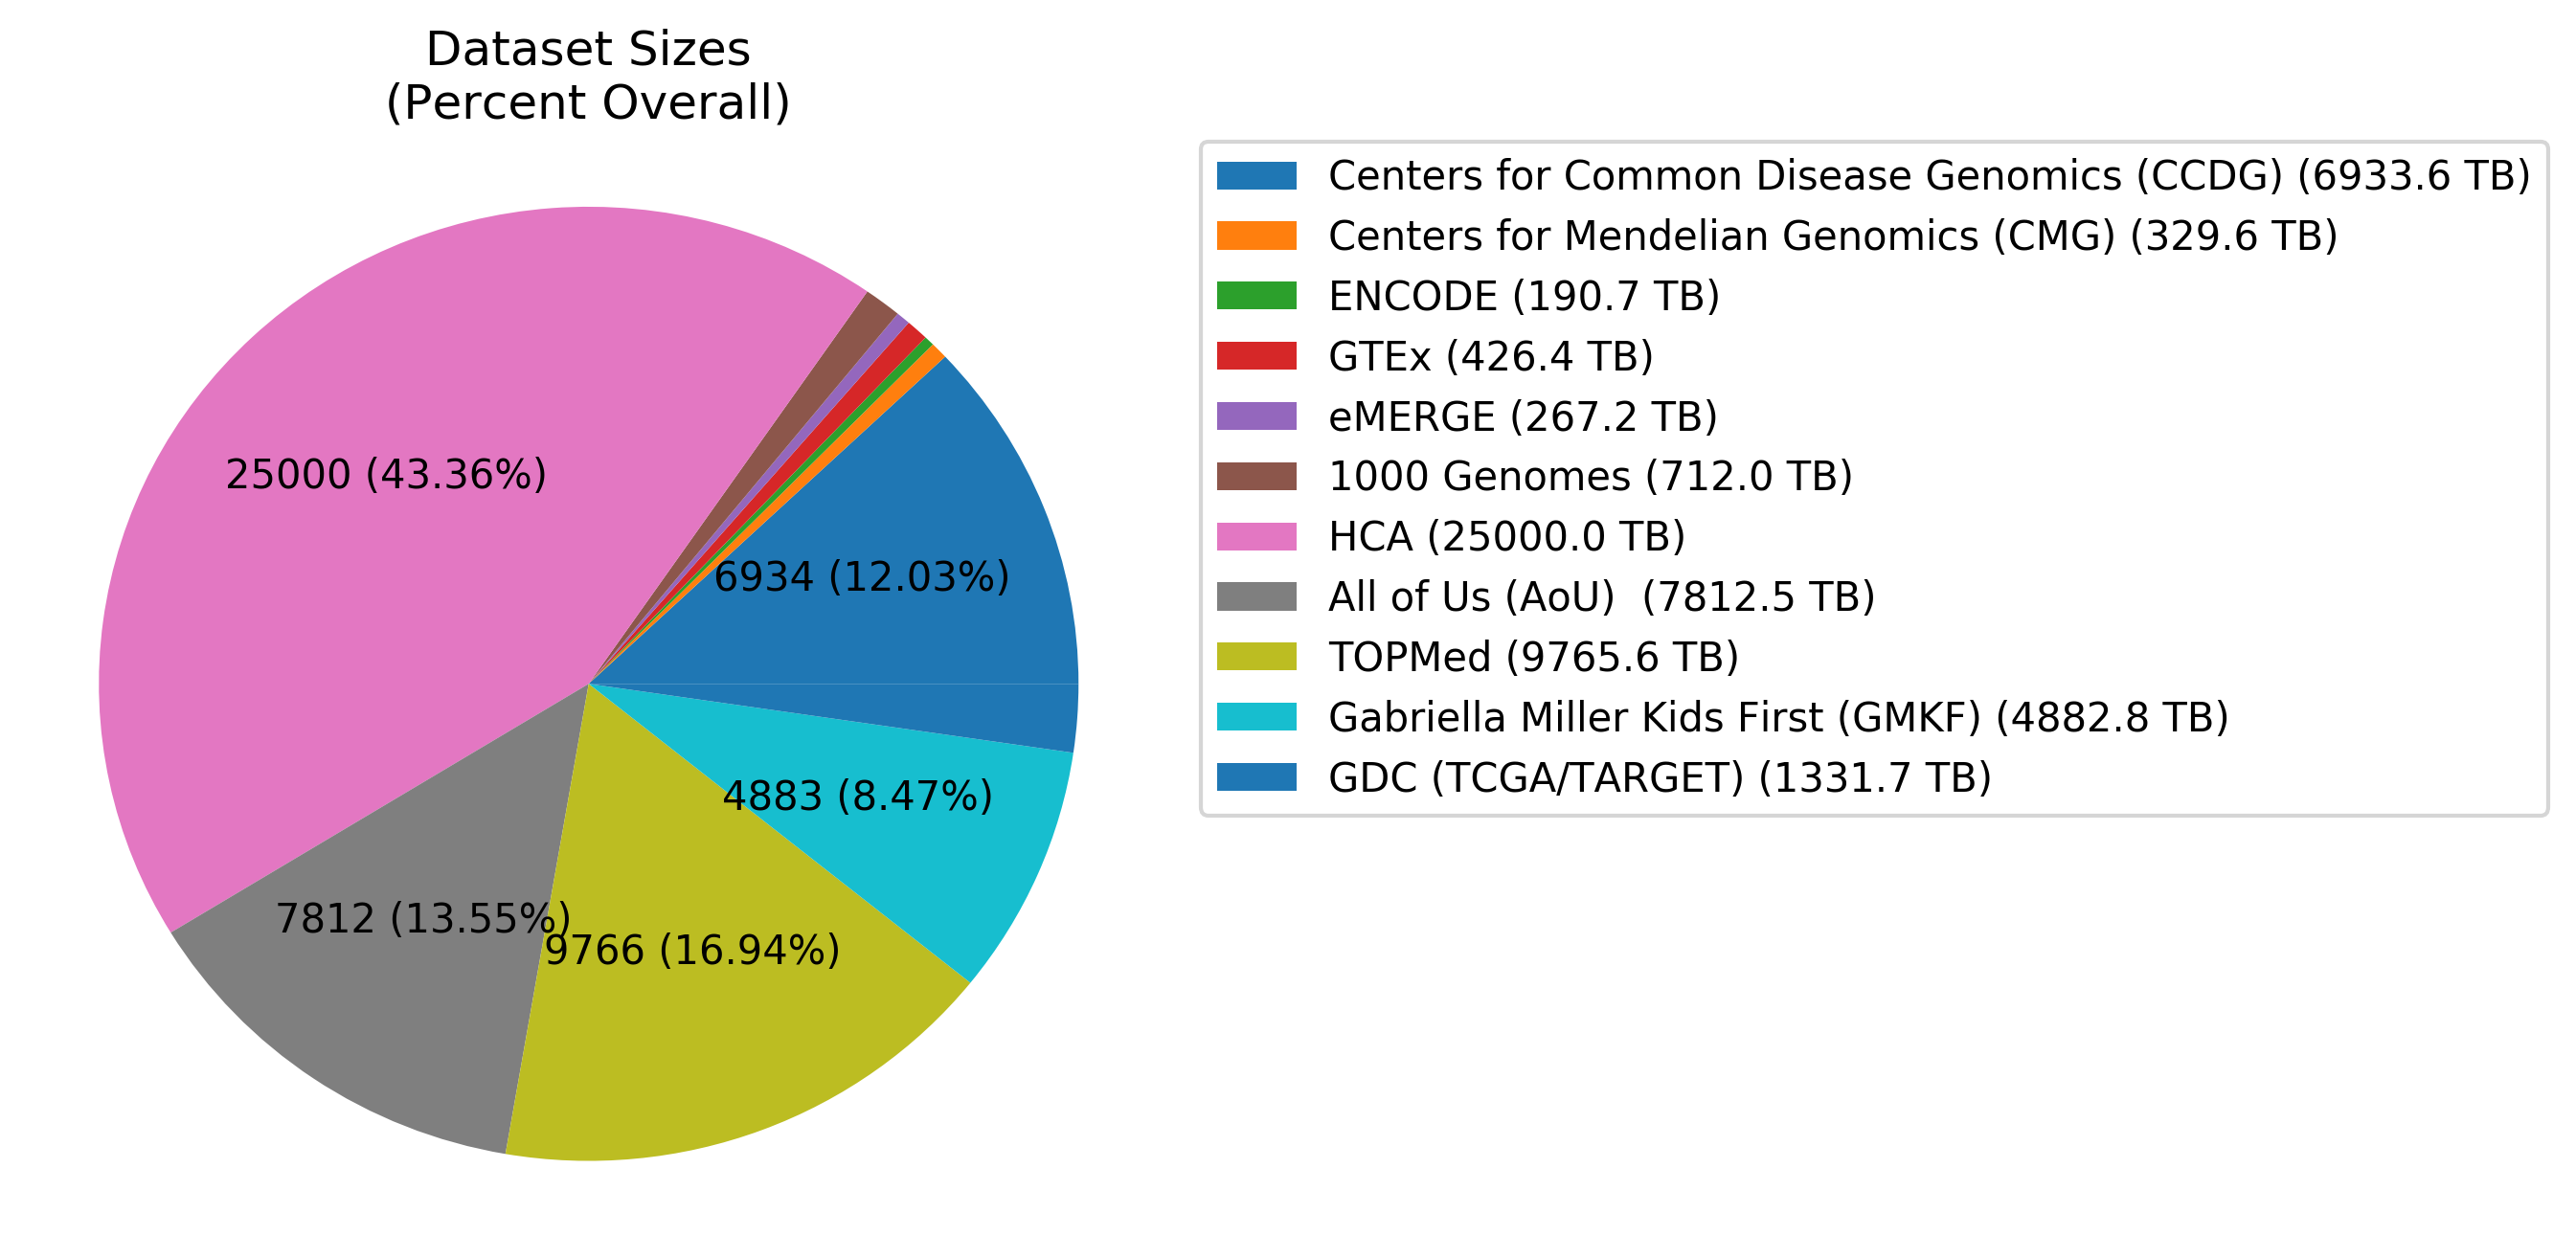

In [9]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if (pct < 6):
            return ''
        else:
            return '{v:d} ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

# now work on piechart for dataset sizes

data = pd.read_csv('datasets.tsv', sep='\t')
data = data.set_index("Project")

labels = list(data.columns.values)
labels = labels[0:13]

projects = list(data.index)

plt.figure(num=2, figsize=(5, 5), dpi=300)

tb_data = data['Dataset Size TB'].values
#print (projects)
#print (tb_data)
labels_with_size = list(map(lambda x, y: str(x)+' ('+str(y)+' TB)', list(projects), list(tb_data)))

plt.subplot(1, 1, 1)

p = plt.pie(tb_data, labels=None, autopct=make_autopct(tb_data), radius=1.1)
plt.title(textwrap.fill("Dataset Sizes (Percent Overall)", 20))
plt.legend(labels=labels_with_size, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

color_cycle = plt.rcParams['axes.color_cycle']

['Centers for Common Disease Genomics (CCDG)', 'Centers for Mendelian Genomics (CMG)', 'ENCODE', 'GTEx', 'eMERGE', '1000 Genomes', 'HCA', 'All of Us (AoU) ', 'TOPMed', 'Gabriella Miller Kids First (GMKF)', 'GDC (TCGA/TARGET)']
[  6933.6    329.6    190.7    426.4    267.2    712.   25000.    7812.5
   9765.6   4882.8   1331.7]


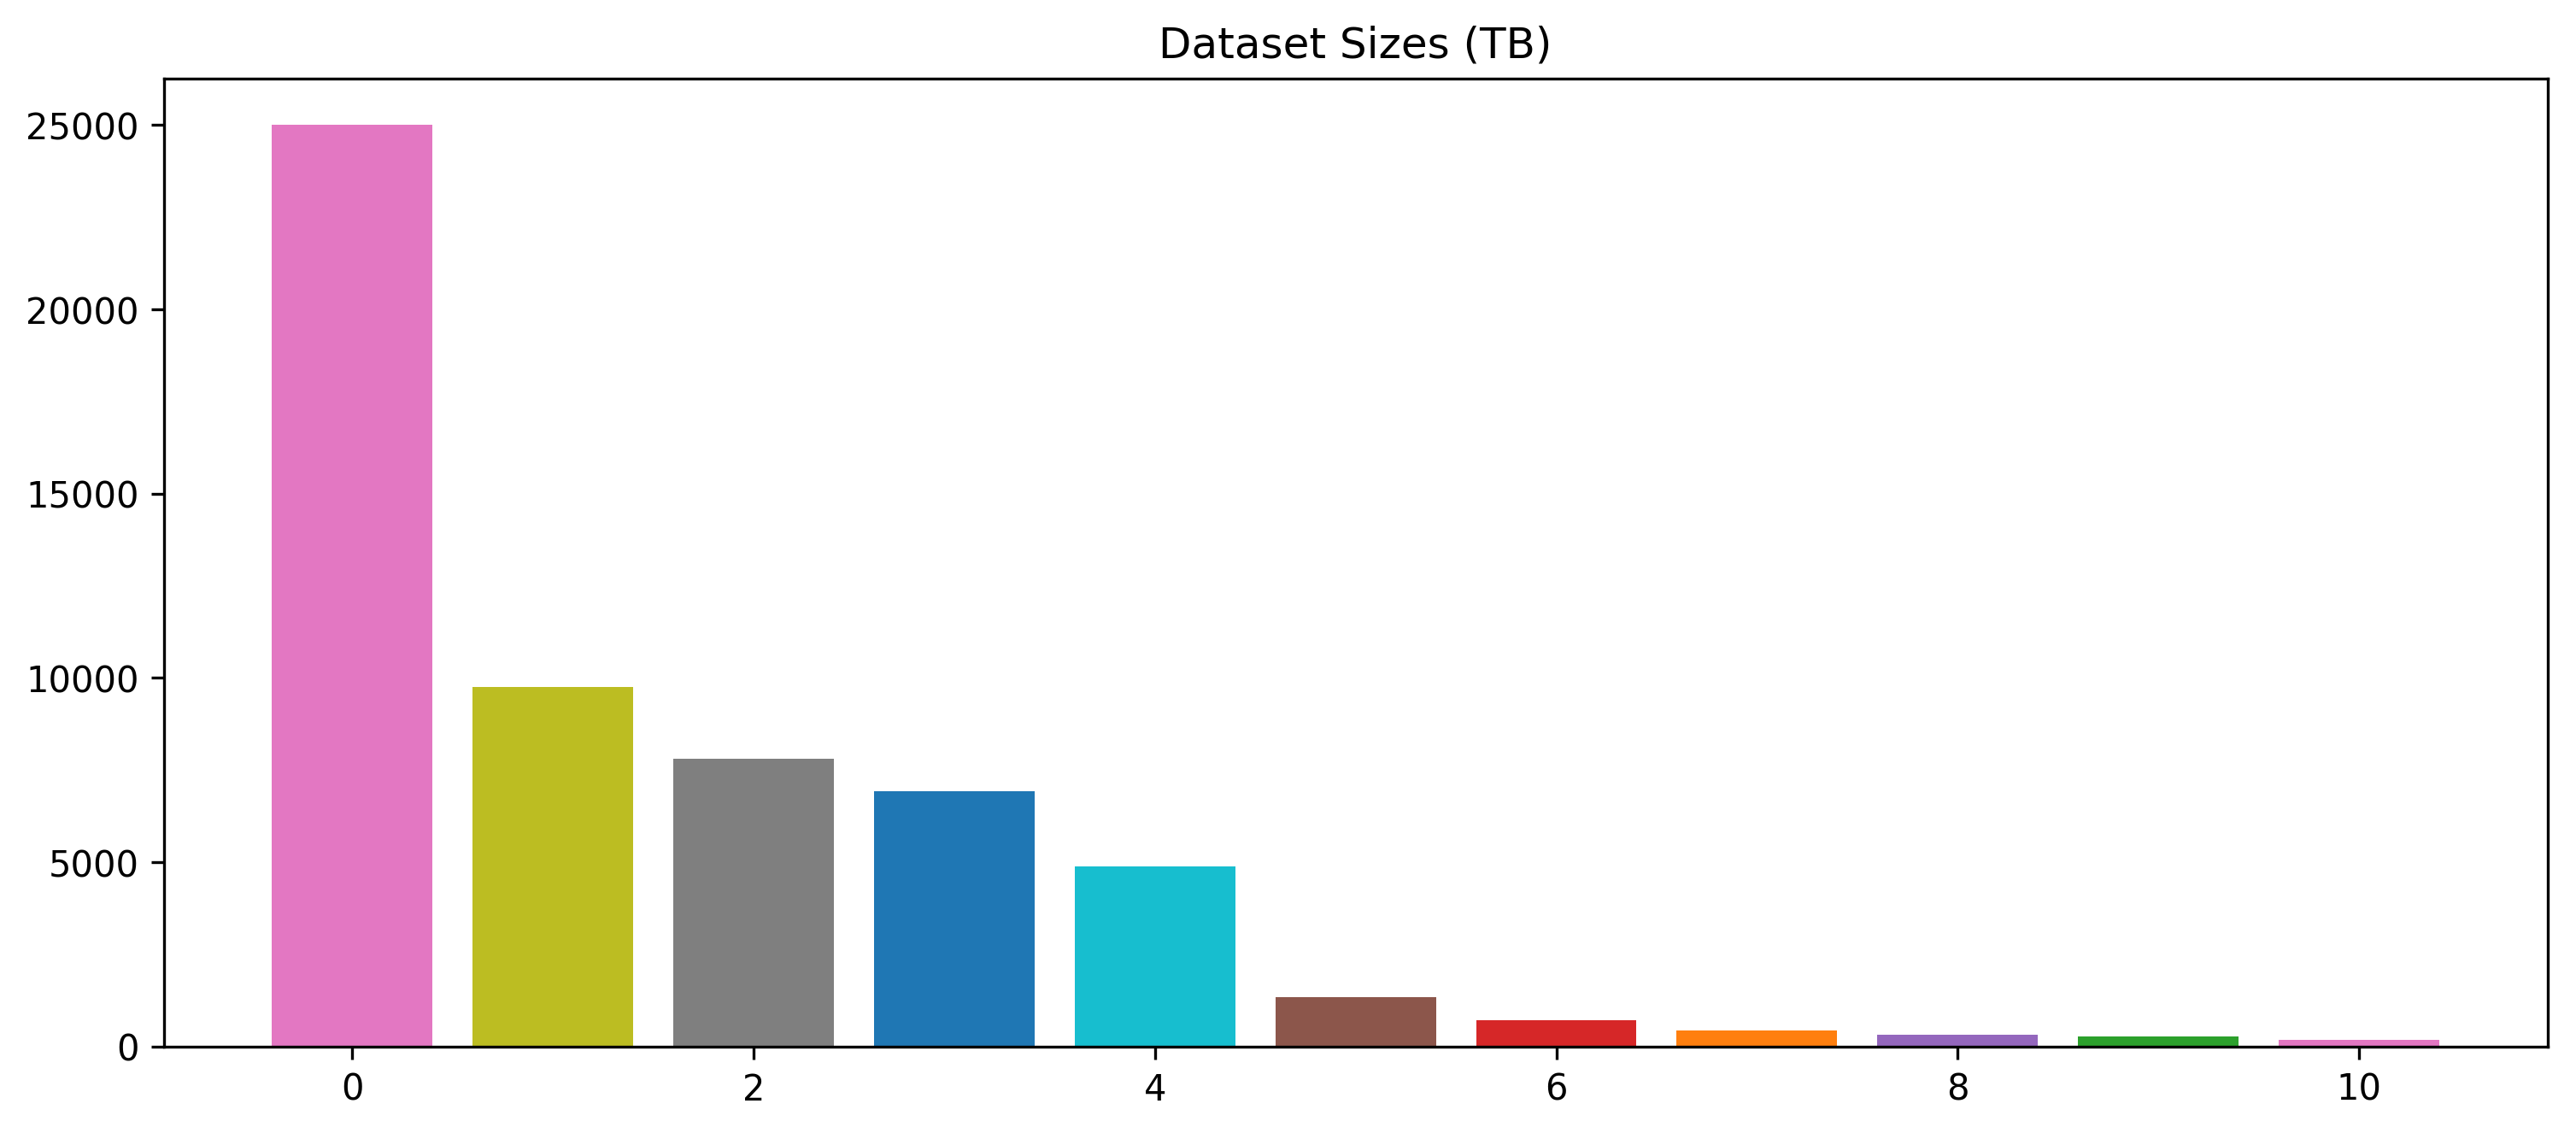

In [10]:
import numpy as np

plt.figure(num=2, figsize=(12, 5), dpi=300)

tb_data = data['Dataset Size TB'].values
print (projects)
print (tb_data)

# reorder to make it easier to read
new_projects = [x for _,x in sorted(zip(tb_data,projects), reverse=True)]
new_colors = [x for _,x in sorted(zip(tb_data,color_cycle), reverse=True)]
new_data = [x for _,x in sorted(zip(tb_data,tb_data), reverse=True)]

plt.subplot(1, 1, 1)

plt.bar(np.arange(len(new_projects)), new_data, color=new_colors, tick_label=None)
plt.title(textwrap.fill("Dataset Sizes (TB)", 25))
#plt.legend(labels=labels_with_size, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)